# Réseaux neuronaux

<img src="images/mnist-examples.png"/>

Quelques guides:
- keras https://keras.io/getting_started/intro_to_keras_for_engineers/
- keras https://www.tensorflow.org/tutorials/quickstart/beginner
- (tf2) https://becominghuman.ai/image-classification-with-tensorflow-2-0-without-keras-e6534adddab2
- (tf1) https://github.com/neodelphis/tensorflow-without-a-phd-french/blob/master/mnist_03_softmax.ipynb

## Softmax

Créer et mesurer les résultats d'un réseau neuronal simple couche complètement connecté avec softmax comme fonction d'activation

In [29]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical

Récupération des données sous forme de tableaux numpy

In [38]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [39]:
x_train, x_test = x_train/255, x_test/255

In [40]:
# Dimension de l'ensemble d'entraînement des images:
x_train.shape

(60000, 28, 28)

In [41]:
# Dimension de l'ensemble d'entraînement des étiquettes:
y_test.shape

(10000,)

Travail préparatoire sur les données d'entrée

In [42]:
# 1-hot encoding
y_train, y_test = to_categorical(y_train, dtype='int8'), to_categorical(y_test, dtype='int8')

In [43]:
y_test.shape

(10000, 10)

Définition de l'architecture du réseau de neurones : modèle simple couche complètement connecté avec softmax comme fonction d'activation

In [44]:
from tensorflow.keras import Input, layers, Model

In [46]:
x_in = Input(shape=(28, 28), name="entree")
x = layers.Flatten(name="vectorisation")(x_in)
y_out = layers.Dense(10, activation="softmax", use_bias=True, name="dense")(x)
model = Model(x_in, y_out, name="mono_couche_softmax")
model.summary()

Model: "mono_couche_softmax"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 entree (InputLayer)         [(None, 28, 28)]          0         
                                                                 
 vectorisation (Flatten)     (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Choix de la fonction de coût, de la stratégie d'optimisation et des mesures

In [47]:
# Compile the model
model.compile(
    optimizer="sgd",
    loss="categorical_crossentropy",
    metrics=["categorical_accuracy"],
)

Entraînement du modèle

In [48]:
batch_size = 64
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5)

Epoch 1/5
 28/938 [..............................] - ETA: 5s - loss: 2.3447 - categorical_accuracy: 0.1127

2022-09-29 10:14:30.324527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 5s 6ms/step - loss: 1.0202 - categorical_accuracy: 0.7562
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 0.5569 - categorical_accuracy: 0.8645
Epoch 3/5
938/938 [==============================] - 5s 6ms/step - loss: 0.4747 - categorical_accuracy: 0.8782
Epoch 4/5
938/938 [==============================] - 5s 6ms/step - loss: 0.4350 - categorical_accuracy: 0.8862
Epoch 5/5
938/938 [==============================] - 5s 6ms/step - loss: 0.4105 - categorical_accuracy: 0.8905


Evaluation sur l'ensemble de test

In [49]:
model.evaluate(x_test,  y_test, verbose=2)

2022-09-29 10:14:58.679374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.3791 - categorical_accuracy: 0.8993 - 1s/epoch - 4ms/step


[0.3791193962097168, 0.8993000388145447]

### Visualisation de l'évolution de l'apprentissage

In [17]:
history.history

{'loss': [0.9909905195236206,
  0.5556436777114868,
  0.4756391942501068,
  0.43658483028411865,
  0.41220834851264954],
 'categorical_accuracy': [0.772100031375885,
  0.8631500005722046,
  0.8758000135421753,
  0.8831499814987183,
  0.8882666826248169]}

In [50]:
from matplotlib import pyplot as plt

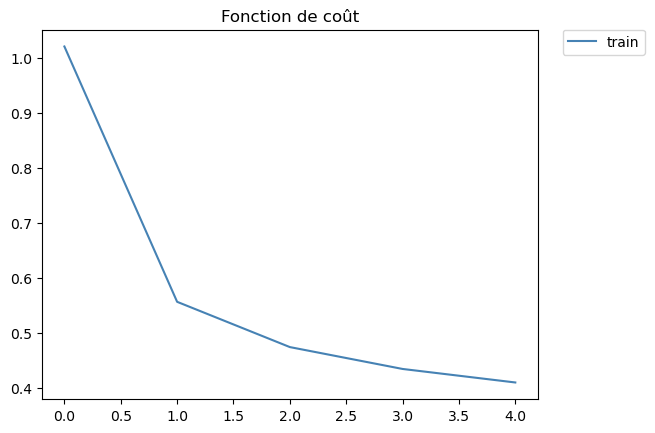

In [51]:
# Fonction de coût : Entropie croisée moyenne
plt.plot(history.history['loss'], c='steelblue', label='train')
plt.title('Fonction de coût')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

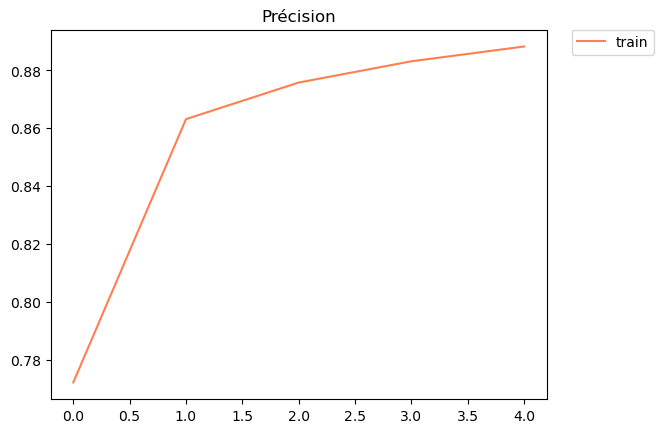

In [19]:
# Précision
plt.plot(history.history['categorical_accuracy'], c='coral', label='train')
plt.title('Précision')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

## Manipulations

Pour chacune des questions suivantes, faire des tests avec différentes valeurs pour essayer de trouver la plus optimisée.
- Où se trouve le taux d'apprentissage, comment le modifier.
- A-t-on besoin de normalisation?
- Quelle est l'influence de la taille du batch?
- Quel est le nombre d'époques optimal pour l'apprentissage?

Comment faire une courbe qui représente l'évolution de la fonction de coût (loss) et la précision lors de l'apprentissage?

Extraire de x_test une centaine de valeurs et appliquer le réseau sur ces valeurs. Trouver quelques exemples où ça ne marche pas, donner la véritable étiquette et celle proposée ainsi qu'une visualisation de l'image correspondante. Est ce que l'erreur vous semble logique?

## Sigmoïde

Créer et mesurer les résultats d'un réseau neuronal complètement connecté:
- première couche 100 neurones avec sigmoïde comme fonction d'activation
- deuxième couche de 10 neurones avec softmax comme fonction d'activation

In [22]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# normalisation
x_train, x_test = x_train/255., x_test/255.
# 1-hot encoding
y_train, y_test = to_categorical(y_train, dtype='int8'), to_categorical(y_test, dtype='int8')

In [52]:
inputs = tf.keras.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(100, activation="sigmoid")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs, name="couche_sigmoid")
model.summary()

Model: "couche_sigmoid"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [53]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1) 


model.compile(
    optimizer=opt,
    loss="categorical_crossentropy",
    metrics=[tf.keras.metrics.CategoricalAccuracy(name="acc")],
)

In [54]:
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5)

Fit on NumPy data
Epoch 1/5
 17/938 [..............................] - ETA: 6s - loss: 2.2499 - acc: 0.2307 

2022-09-29 10:25:39.376222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 6s 6ms/step - loss: 0.7205 - acc: 0.8302
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.3534 - acc: 0.9009
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.3044 - acc: 0.9119
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.2761 - acc: 0.9204
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.2552 - acc: 0.9263


In [26]:
model.evaluate(x_test,  y_test, verbose=2)

2022-09-29 09:42:11.315499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.2462 - acc: 0.9306 - 1s/epoch - 4ms/step


[0.246175616979599, 0.9306000471115112]

## ReLU - Adam - Keras Model

In [55]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(10)
])
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)


Epoch 1/5
  25/1875 [..............................] - ETA: 7s - loss: 1.7101 - accuracy: 0.5062

2022-09-29 10:46:40.686717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.2751 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1239 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0852 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0644 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0504 - accuracy: 0.9846


2022-09-29 10:47:19.572962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.1061 - accuracy: 0.9696 - 1s/epoch - 3ms/step


[0.10610803961753845, 0.9696000218391418]

In [28]:
y_train, y_test = to_categorical(y_train, dtype='int8'), to_categorical(y_test, dtype='int8')
inputs = tf.keras.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(100, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs, name="couche_relu")

model.summary()

model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["categorical_accuracy"],
)
batch_size = 64
print("Fit on NumPy data")
model.fit(x_train, y_train, batch_size=batch_size, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Model: "couche_relu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Fit on NumPy data
Epoch 1/5
 18/938 [..............................] - ETA: 5s - loss: 1.7400 - categorical_accuracy: 0.5069

2022-09-29 09:44:26.795962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 6s 6ms/step - loss: 0.3144 - categorical_accuracy: 0.9119
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.1484 - categorical_accuracy: 0.9571
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.1062 - categorical_accuracy: 0.9695
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0819 - categorical_accuracy: 0.9765
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0661 - categorical_accuracy: 0.9811


2022-09-29 09:44:55.959457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.0788 - categorical_accuracy: 0.9753 - 1s/epoch - 5ms/step


[0.07884851098060608, 0.9753000736236572]